In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def readCSV(file_path):
    column_names = ['id', 'eps',
                    'oliva_greedy', 'oliva_greedy_time', 'oliva_greedy_visit', 'oliva_greedy_status', 'oliva_greedy_lb',
                    'oliva_balance', 'oliva_balance_time', 'oliva_balance_visit', 'oliva_balance_status', 'oliva_balance_lb',
                    'neuralsat', 'neuralsat_time', 'neuralsat_status',
                    'bab_baseline', 'bab_baseline_time', 'bab_baseline_visit', 'bab_baseline_status',
                    'abcrown', 'abcrown_status', 'abcrown_time']
    dataframe = pd.read_csv(file_path, sep=",", header=0, names=column_names)
    return dataframe

# Table 1

In [8]:


l2_instance = len(readCSV('all_results/all_mnistL2.csv'))
l4_instance = len(readCSV('all_results/all_mnistL4.csv'))
oval21_base_instance = len(readCSV('all_results/all_oval21_base.csv'))
oval21_wide_instance = len(readCSV('all_results/all_oval21_wide.csv'))
oval21_deep_instance = len(readCSV('all_results/all_oval21_deep.csv'))

l2_images = readCSV('all_results/all_mnistL2.csv')["id"].nunique()
l4_images = readCSV('all_results/all_mnistL4.csv')["id"].nunique()
oval21_base_images = readCSV('all_results/all_oval21_base.csv')["id"].nunique()
oval21_wide_images = readCSV('all_results/all_oval21_wide.csv')["id"].nunique()
oval21_deep_images = readCSV('all_results/all_oval21_deep.csv')["id"].nunique()

# Create a formatted table with aligned columns
print("Model\t\tArchitecture\t\tDataset\t\t#Activations\t# Instances\t#Images")
print(f"MNISTL2\t\t2 × 256 linear\t\tMNIST\t\t512\t\t{l2_instance}\t\t{l2_images}")
print(f"MNISTL4\t\t4 × 256 linear\t\tMNIST\t\t1024\t\t{l4_instance}\t\t{l4_images}")
print(f"OVAL21BASE\t2 Conv, 2 linear\tCIFAR-10\t3172\t\t{oval21_base_instance}\t\t{oval21_base_images}")
print(f"OVAL21WIDE\t2 Conv, 2 linear\tCIFAR-10\t6244\t\t{oval21_wide_instance}\t\t{oval21_wide_images}")
print(f"OVAL21DEEP\t4 Conv, 2 linear\tCIFAR-10\t6756\t\t{oval21_deep_instance}\t\t{oval21_deep_images}")

Model		Architecture		Dataset		#Activations	# Instances	#Images
MNISTL2		2 × 256 linear		MNIST		512		100		70
MNISTL4		4 × 256 linear		MNIST		1024		78		52
OVAL21BASE	2 Conv, 2 linear	CIFAR-10	3172		173		53
OVAL21WIDE	2 Conv, 2 linear	CIFAR-10	6244		196		53
OVAL21DEEP	4 Conv, 2 linear	CIFAR-10	6756		143		40


# Figure 3 

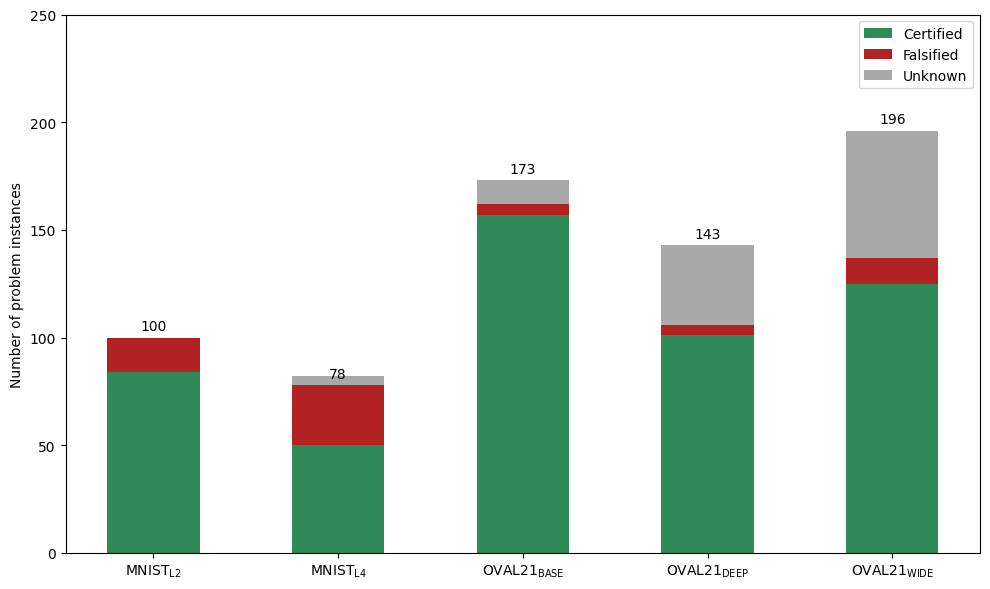

In [9]:
df1 = pd.read_csv('all_results/all_mnistL2.csv')
df2 = pd.read_csv('all_results/all_mnistL4.csv')
df3 = pd.read_csv('all_results/all_oval21_base.csv')
df4 = pd.read_csv('all_results/all_oval21_deep.csv')
df5 = pd.read_csv('all_results/all_oval21_wide.csv')
combined_df = pd.concat([df1, df2, df3, df4, df5], axis=0)   

def print_status_count(combined_df):
    status_df = combined_df[["id","eps","oliva_greedy_status", "oliva_balance_status", "bab_baseline_status", "abcrown_status", "neuralsat_status"]]
    return (status_df[(status_df["oliva_greedy_status"] == "Status.VERIFIED") | (status_df["oliva_balance_status"] == "Status.VERIFIED") | (status_df["bab_baseline_status"] == "Status.VERIFIED") | (status_df["abcrown_status"] == "Status.VERIFIED") | (status_df["neuralsat_status"] == "Status.VERIFIED")].shape[0]), ( status_df[(status_df["oliva_greedy_status"] == "Status.ADV_EXAMPLE") | (status_df["oliva_balance_status"] == "Status.ADV_EXAMPLE") | (status_df["bab_baseline_status"] == "Status.ADV_EXAMPLE") | (status_df["abcrown_status"] == "Status.ADV_EXAMPLE") | (status_df["neuralsat_status"] == "Status.ADV_EXAMPLE")].shape[0]), status_df.shape[0]

import matplotlib.pyplot as plt
import numpy as np

# Get counts for each dataframe
dataframes = [df1, df2, df3, df4, df5]
names = ['mnistL2', 'mnistL4', 'oval21_base', 'oval21_deep', 'oval21_wide']
data = []

for df in dataframes:
    certified, falsified, total = print_status_count(df)
    unknown = total - certified - falsified
    data.append([certified, falsified, unknown])

# Convert to numpy array for easier manipulation
data = np.array(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create stacked bars with reduced width (0.5)
bottom_certified = np.zeros(len(names))
bottom_falsified = data[:, 0]  # Start falsified after certified
bottom_unknown = data[:, 0] + data[:, 1]  # Start unknown after falsified

# Create stacked bars with reduced width (0.5)
ax.bar(names, data[:, 0], width=0.5, label='Certified', color='#2E8B57')  # Light green
ax.bar(names, data[:, 1], width=0.5, bottom=data[:, 0], label='Falsified', color='#B22222')  # Dark red 
ax.bar(names, data[:, 2], width=0.5, bottom=data[:, 0] + data[:, 1], label='Unknown', color='#A9A9A9')  # Dark gray

# Customize the plot
ax.set_ylabel('Number of problem instances')
# ax.set_title('Distribution of Cases by Dataset')
ax.set_ylim(0, 250)  # Set y-axis limits from 0 to 200

labels = ['$\mathdefault{MNIST_{L2}}$', '$\mathdefault{MNIST_{L4}}$',
         '$\mathdefault{OVAL21_{BASE}}$', '$\mathdefault{OVAL21_{DEEP}}$', 
         '$\mathdefault{OVAL21_{WIDE}}$']

# First set the positions of the ticks
ax.set_xticks(range(len(names)))
# Then set the labels
ax.set_xticklabels(labels)

ax.legend()

# Add total numbers on top of each bar
for i in range(len(names)):
    total = sum(data[i])
    ax.text(i, total + 2, f'{int(total)}', ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.savefig('dis_case_condition.png')
plt.show()


# get data for Figure 4

In [10]:
def histoData(file_path):
    df = readCSV(file_path)
    ins_num_10 = df[df['bab_baseline_visit'].astype(int) <= 10].shape[0]
    ins_num_50 = df[(df['bab_baseline_visit'].astype(int) > 10) & (df['bab_baseline_visit'].astype(int) <= 50)].shape[0]
    ins_num_100 = df[(df['bab_baseline_visit'].astype(int) > 50) & (df['bab_baseline_visit'].astype(int) <= 100)].shape[0]
    ins_num_200 = df[(df['bab_baseline_visit'].astype(int) > 100) & (df['bab_baseline_visit'].astype(int) <= 200)].shape[0]
    ins_num_500 = df[(df['bab_baseline_visit'].astype(int) > 200) & (df['bab_baseline_visit'].astype(int) <= 500)].shape[0]
    ins_num_1000 = df[(df['bab_baseline_visit'].astype(int) > 500) & (df['bab_baseline_visit'].astype(int) <= 1000)].shape[0]
    return [ins_num_10, ins_num_50, ins_num_100, ins_num_200, ins_num_500, ins_num_1000]

# make Figure 4

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def getFigure4():
    files_list = [
        'all_results/all_mnistL2',
        'all_results/all_mnistL4',
        'all_results/all_oval21_base',
        'all_results/all_oval21_deep',
        'all_results/all_oval21_wide'
    ]
    colors = plt.cm.RdYlBu(np.linspace(0.1, 0.9, len(files_list)))
    fig, ax = plt.subplots(figsize=(10, 6))
    labels = ['$\mathdefault{MNIST_{L2}}$', '$\mathdefault{MNIST_{L4}}$',
              '$\mathdefault{OVAL21_{BASE}}$', '$\mathdefault{OVAL21_{DEEP}}$', 
              '$\mathdefault{OVAL21_{WIDE}}$']

    bin_data = []
    for file_name in files_list:
        file_path = f'{file_name}.csv'
        bin_data.append(histoData(file_path))

    bins_tick = [0, 10, 50, 100, 200, 500, 1000]
    custom_labels = ['0-10', '11-50', '51-100', '101-200', '201-500', '501-1000']

    bin_data = np.array(bin_data)
    p = []

    # Plotting the histogram with increased spacing between bars
    bar_width = 0.8  # Decrease the width of the bars to increase spacing
    for bin_num, bins in enumerate(bin_data):
        bottom = np.sum(bin_data[:bin_num, :], axis=0)
        p.append(ax.bar(np.arange(len(bins_tick)-1) * 1.4, bins, bar_width, bottom=bottom, color=colors[bin_num], lw=0.4, ec='k'))

    # Set the x-ticks and labels with custom ranges
    ax.set_xticks(np.arange(len(bins_tick)-1) * 1.4)
    ax.set_xticklabels(custom_labels, fontsize=18)

    ax.set_xlim(-0.6, (len(bins_tick)-1) * 1.4 - 0.6)

    ax.yaxis.set_tick_params(labelsize=18)

    ax.legend(handles=p, labels=labels, fontsize=14)
    ax.set_ylabel('Number of problem instances', fontsize=20)
    ax.set_xlabel('Number of nodes in BaB trees', fontsize=20)

    # Adjusting the margins
    plt.subplots_adjust(left=0.1, right=0.9)

    plt.savefig('histo.png', bbox_inches='tight', dpi=300)



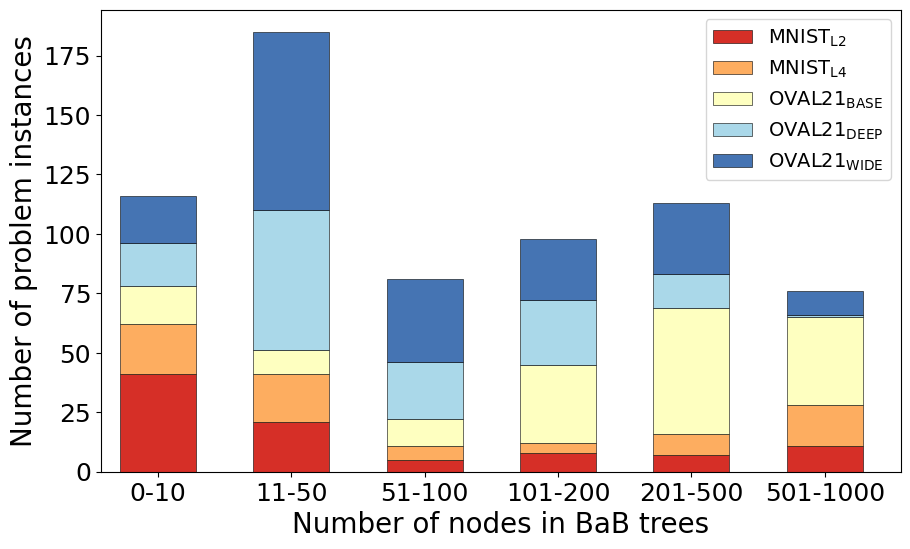

In [12]:
getFigure4()